In [1]:
# polynomial-regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create sample data
X = np.array([1,3,5,8,11,14,17,20]).reshape(-1, 1) # age 
y = np.array([10,15,22,35,50,65,72,75]) # weight

# step 1 function to plot any degree
def plot_polynomial(degree,color,label):
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Train model
    model = LinearRegression()
    model.fit(X_poly,y) 
    
    # Predict curve
    X_smooth = np.linspace(0,25,200).reshape(-1,1)
    X_smooth_poly = poly.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)
    
    plt.plot(X_smooth,y_smooth,color=color,linewidth=3,label=label)
    
    # print equation
    coeffs = model.coef_
    intercept = model.intercept_
    print(f"\n{label} Equation ")
    eq = f"y = {intercept}"
    for i,c in enumerate(coeffs):
        eq += f"+ {c:.3f}*x^{i+1}"
    print(eq)
    
    return model,poly


Linear Degree 1 Equation 
y = 5.55175067333591+ 3.792*x^1

Linear Degree 2 Equation 
y = 1.4443262359693279+ 5.068*x^1+ -0.062*x^2

Cubic Degree 3  Equation 
y = 9.182178257912632+ 0.555*x^1+ 0.479*x^2+ -0.017*x^3


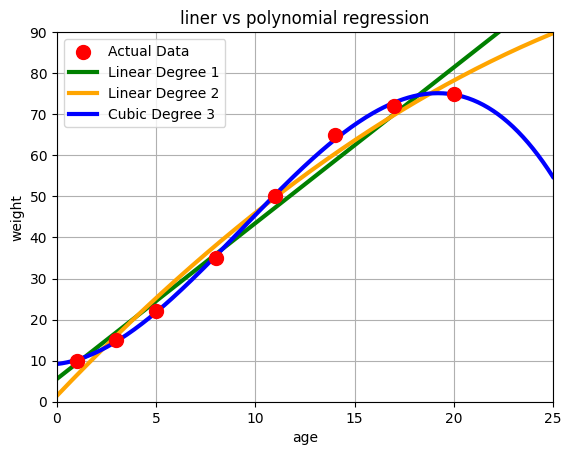

In [2]:
# plots 
plt.scatter(X,y,color='red',s=100,label='Actual Data',zorder=5)
plot_polynomial(1,'green','Linear Degree 1')
plot_polynomial(2,'orange','Linear Degree 2')

# Quadratic (degree 3)
model_cubic,ploy_cubic = plot_polynomial(3,'blue','Cubic Degree 3 ')
plt.xlabel("age")
plt.ylabel("weight")
plt.title('liner vs polynomial regression')
plt.legend()
plt.grid()
plt.ylim(0,90)
plt.xlim(0,25)
plt.show()

